In [4]:
import numpy as np

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stat

In [6]:
import ipywidgets as widgets

## Central Limit Theorem

In [7]:
population = pd.DataFrame()

# Create an column that is 10000 random numbers drawn from a uniform distribution
population['numbers'] = np.random.uniform(0,10000,size=10000)

In [58]:
population.head()

,numbers
0,5469.891585
1,6885.707709
2,810.474257
3,8899.907146
4,181.934928


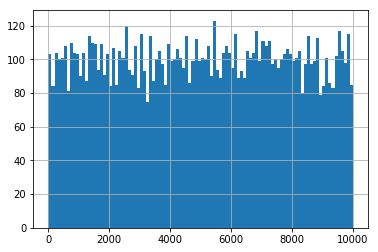

In [9]:
# Plot a histogram of the score data.
# This confirms the data is not a normal distribution. histtype is optional, default is bar, try step or stepfilled
population['numbers'].hist(bins=100, histtype='bar')
plt.show()

In [10]:
population.mean()

numbers    5001.659324
dtype: float64

In [11]:
# View the mean of the numbers
population['numbers'].mean()

5001.659323503355

In [12]:
#just takes a sample from the dataframe with a specified n
my_sample = population.sample(n=100).mean()
my_sample

numbers    5298.845798
dtype: float64

In [13]:
#returns value and data type
my_sample

numbers    5298.845798
dtype: float64

In [14]:
#returns value in an array
my_sample.values

array([5298.84579792])

In [15]:
#returns the value as itself
my_sample.values[0]

5298.845797915652

In [21]:
# Create a list
sampled_means_100 = []

# Take a thousand samples of 100 from the population dataframe
for i in range(0,1000):
    # Take a random sample of 100 rows from the population, take the mean of those rows, append to sampled_means
    sample = population.sample(n=100).mean().values[0]
    
    sampled_means_100.append(sample)
    
    

In [94]:
sampled_means_50 = []
# Take a thousand samples of 100 from the population dataframe
for i in range(0,1000):
    # Take a random sample of 100 rows from the population, take the mean of those rows, append to sampled_means
    sampled_means_50.append(population.sample(n=50).mean().values[0])

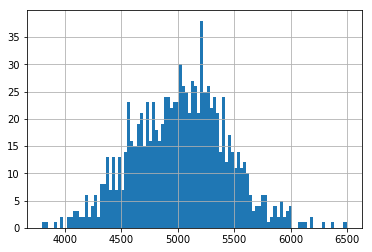

In [95]:
#Can see the difference in distribution when comparing a sample size of 50 to a sample size of 100
pd.Series(sampled_means_50).hist(bins=100)

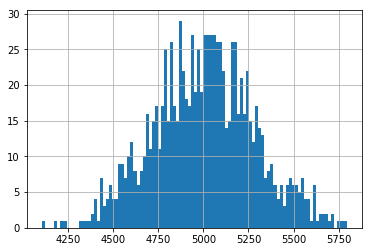

In [22]:
# Plot a histogram of sampled_means. 
# It is clearly normally distributed and centered around 5000, as we would expect for random numbers picked between 0 and 10000

pd.Series(sampled_means_100).hist(bins=100)

In [89]:
# pd.DataFrame(sampled_means).hist(bins=100)
# plt.show()


In [93]:
pd.Series(sampled_means_100).mean()

5020.194093706675

In [7]:
arr = [2,2,3,9,5,6]
arrX = [1,2,3,4,5,6]

In [9]:
themean = stat.mean(arr)
themean

4.5

In [10]:
sd = stat.stdev(arr)
sd

2.7386127875258306

In [11]:
#array of +/- 3sd values
print([sd*3,sd*-3])

[8.215838362577491, -8.215838362577491]


In [12]:
#array of min and max x values
#thought would be to use min and max to plot the single sd lines
print([min(arrX),max(arrX)])

[1, 6]


### Western Electric Rules

Rule 1: Any single data point falls outside the 3σ-limit from the centerline (i.e., any point that falls outside Zone A, beyond either the upper or lower control limit)

In [52]:
#myArr = [1,2,3,3,4,2,5,4]
myArr = list(np.random.randint(50, 100, size=100))

In [53]:
def rule1(arr,newNum):
    themean = stat.mean(arr)
    sd = stat.stdev(arr)
    sigUp = themean + sd*3
    sigDown = themean - sd*3
    if newNum > sigUp:
        print(f"Rule 1 Violation. Upper Control Limit (UCL -- mean + 3SD) is {round(sigUp,1)}")
    elif newNum < sigDown:
        print(f"Rule 1 Violation. Lower Control Limit (LCL mean - 3SD) is {round(sigDown,1)}")
    else:
        myArr.append(newNum)
        print("New datum added to list")
        print(myArr)

In [54]:
rule1(myArr,1)

Rule 1 Violation. Lower Control Limit (LCL mean - 3SD) is 29.0


In [22]:
themean = stat.mean(myArr)
sd = stat.stdev(myArr)
sigUp = themean + sd*3
sigDown = themean - sd*-3
print(sigUp)

6.927922024247863


In [ ]:
#want to check for violations
#if two consecutive samples are above the mean, flag the 2+ samples
#once it drops below the mean, clear the flag array
#remember, with plotly you can just pass an array of colors
#need to use stride tricks - or try to use stride tricks
abflags = []
belFlags = []
for num,index in enumerate(arr):
  print(index, num)


# plt.plot([1,2,3])

# plt.savefig('plot.png')